---
# Lab 1. Optimizing memory and execution speed of Python code with GenAI

**PUY33C01 Computational Simulation I - Computational Physics (Christie)**					

---
## What are the objectives of this lab?

* Interact with a Generative AI assistant (GenAI) to debug benchmark Python code
* Understand the consequences of not questioning AI-generated solutions
* Use GenAI as a tutor to understand the trade-offs between memory and speed
* Use GenAI to assess how different data structures impact performance
* Assess an improved programming solution for the benchmark code suggested by GenAI

---
## Introduction

### Goals
* In this lab you will interact with a Generative AI assistant (GenAI) to debug and improve the performance of a simple program. 

* GenAI will also effectively play the role of a tutor, and you are encouraged interact with it to understand the pros and cons of using two different data structures to implement the program.
 

---
Take note:

* GenAI can help you understand, write and improve code, but it is important to review, test, and understand all suggestions. It can and does make mistakes or suggest sub-optimal solutions.
* It is your responsibility to catch these mistakes. In fact, one of the primary purposes of this lab is to gain experience in catching errors suggested by GenAI code assistants.
* University policy requires you to comment in your code and in your report where GenAI made a significant contribution or change. However, in this lab you are required to use GenAI in formulating your answers and so this declaration is not needed.
* University policy encourages you to use Copilot which is part of the Microsoft 365 platform available to TCD students.
  

---  
### Lab structure and assignment

The lab is divided into four tasks:

1. Correct errors in a Python program and obtain working code compliant with a set of program specifications.
2. Add code to the program to correctly measure execution time and memory usage.
3. Measure potential improvements to memory usage and execution time speed by changing from _lists_ to _arrays_ to store data, while retaining the overall program structure.
4. Give GenAI the freedom to suggest the best overall structure and data types for the program to maximise performance, consistent with a set of updated program specifications.

You will have an assigmnent to write a report on this lab. The report should not be structured as a list of responses to the four tasks. It should be a reflection of what you have learned and the tasks should be used as a mechanism to generate data to support your reasoning. More details for the report structure are provided in the assignment document.

---  
### Lists and arrays

The focus of this lab is on the trade-offs between two of the most commonly used data structures in scientific computing: _lists_ and _arrays_.  Superficially, both data structures look very similar and are created by enclosing data within square parentheses
```python
list1 = [0,1,2,3]

import numpy as np
array1 = np.array([0,1,2,3])
```
but the selection of one over the other can have dramatic consequences both memory usage and execution speed. In this lab we shall restrict ourselves to the trade-offs for storing and processing integer data, but the principles have general applicability.

---
## Task 1
### The scenario

You have recently been hired by Tyrell Code Development (TCD) as a Python programmer. Tyrell has a contract with an important client and you have been assigned to develop a sub-routine as one of the deliverables of this high-profile project.

The purpose of the sub-routine is to generate a 2D, list-based lookup table and the specifications provided by the client are:

1. The sub-routine _listfun1_ calculates the function $y=x^b$ for three integer values of b and a range of 10 integer x-values.
2. List-based data structures are to be used throughout.
3. The results must be returned as a 2D structure with rows corresponding to the values of y for different values of x and columns corresponding to the values of y for different values of b.

---
The Python code that was developed to meet these specifications is shown in the code cell below. The code documentation provided the following overview of the programming solution:

For each b in the list _b_values_, the inner loop computes the values of y corresponding to the range of x values and appends the result to a 1D list _row_. The outer loop progresses through the different values of b in the list _b_values_, and each new _row_ is appended to the 2D list _results_.

Unfortunately, the code does not run. The (now ex-) colleague who wrote the code has left the company to pursue external challenges.

The client is very unhappy. Your manager is also very unhappy. His large bonus is dependent on delivering working code on time and according to the client's specifications. He has no experience with programming in Python, and you have recently discovered he does not have a technical background at all.

Given:

In [1]:
import matplotlib.pyplot as plt

x_values = list(range(10))
b_values = [1,2,3]

def listfun1(x_values, b_values):
    results = []
    for b in b_values:   
        for x in x_values:
            y = x*b
            row.append(y)           
        results.append(row)
    return results

results = listfun1(x_values,b_values)

print('rows =',len(results))
print('cols = ',len(results[0]))

plt.plot(results)

NameError: name 'row' is not defined

Corrected Version

rows = 3
cols = 10


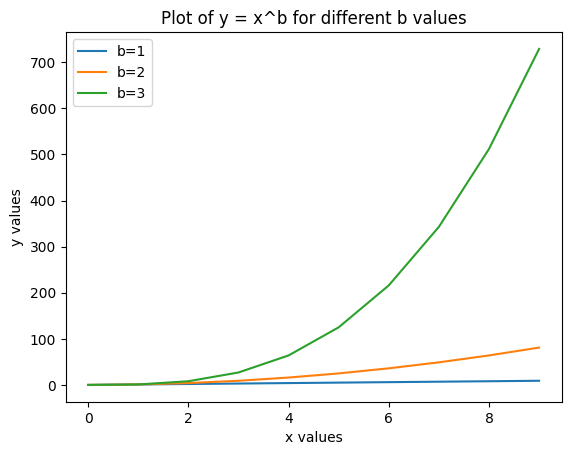

In [2]:
import matplotlib.pyplot as plt

x_values = list(range(10))
b_values = [1, 2, 3]

def listfun1(x_values, b_values):
    results = []  # Initialize the 2D list to store results
    for b in b_values:   
        row = []  # Initialize a new row for each value of b
        for x in x_values:
            y = x ** b  # Corrected the formula to calculate x^b
            row.append(y)  # Append the calculated value to the row
        results.append(row)  # Append the row to the results
    return results

results = listfun1(x_values, b_values)

print('rows =', len(results))  # Number of rows corresponds to the number of b values
print('cols =', len(results[0]))  # Number of columns corresponds to the number of x values

# Transpose the results to match the plotting requirements
transposed_results = list(map(list, zip(*results)))

plt.plot(transposed_results)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Plot of y = x^b for different b values')
plt.legend([f'b={b}' for b in b_values])
plt.show()

---
### Action items

Find the errors in this program. These may include errors which prevent the execution of the program but also may include errors in implementing the client's specifications.

The goal is to get the code running according to the client's specifications, not to change its structure: the inner and outer list-based loops are to be retained. The basic plotting function and print statements are also to be retained as their purpose is to provide quick checks that the code is functioning as specified. They will not be needed in later tasks.

It is therefore important to inform your GenAI coding assistant of the client's specifications before trying to fix the code. Pay careful attention to constructing prompts to guide the GenAI assistant into providing working, specification-compliant code.

You will use the corrected code as performance benchmark to compare with other programming approaches and there is significant overhead associated with running the code within a notebook. Place your corrected code in a separate Python file _listfun1.py_ and run it directly from within Spyder or from a terminal. Run the code several times, and note the last set of performance parameters.

---
## Task 2
### The scenario

The client is still very unhappy. Although now functioning correctly, when embedded as a call within the client's main program, the function _listfun1_ uses too much memory and the execution time is too long. This was because the client now requires a range 1,000 x-values to be used and not the range of 10 values originally specified in the contract.

### Action items

#### Action item 2A.

Copy the corrected, working code from listfun1.py to listfun2a.py and change the name of the function to listfun2a. Update the code to:
* Increase the range of x-values from the original 10 to 1,000.
* Delete (or comment out) the plotting function and the row and column print statements. You can therefore delete the line
```python
import matplotlib.pyplot as plt
```

* To check the validity of the client's concerns, use GenAI to make suggestions for using start and end timing commands to capture the execution time of  _listfun2a_ in milliseconds (ms) by importing and using timing commands from the _time_ library.

* To make sure you emphasise memory efficiency in your code, the client has "suggested" you use the function _sys.getsizeof(results)_ to measure the memory used by _results_ in bytes (this function must be imported as part of the _sys_ library). Discuss with your GenAI assistant how to implement the client's "suggestion".

Run _listfun2a.py_ and note the execution speed and memory usage to the nearest millisecond and kB (1 kB = 1024 bytes). Run the code several times, and note the last set of performance parameters.

#### Action item 2B

Fortunately, a colleague passed by your desk and pointed out that using  _sys.getsizeof(results)_ to determine memory usage only returns the memory size of the outer list, referred to as shallow memory. This value is constructed from the sum of the pointers to memory locations stored in _results_ and not the values stored in the memory locations themselves. This will grossly underestimate the actual memory usage. Fortunately, you did not share the results of the flawed memory evaluation with your client or manager.

Use your GenAI assistant to come up with suggestions to correctly evaluate the memory usage for the list _results_.This should be the sum of the memory used for pointers (which includes some small overhead) and data. Place your corrected code in listfun2b.py and run the code several times, and note the last set of performance parameters. You might observe that the execution time is significantly different than that produced by executing the code within the code cell.

## Task 3
### The scenario

Delivery of the correct evaluation of execution time and memory usage using _listfun2b_ has confirmed the client's concerns. Your program clearly no longer meets the revised memory specifications of the client.

Your ever-helpful colleague has suggested that the only way to meet the revised specifications is if you switch from a list-based approach to an array-based approach, using arrays from the _NumPy_ library.

Lists and arrays look very similar but possess fundamentally different trade-offs. Your colleague assures you that array-based approaches are widely used for scientific computing as they offer the possibility of increased speed and lower memory.

Unfortunately, you are not familiar with array-based programming but your colleague quickly converts your list-based code in _listfun2b.py_ to an equivalent array-based version for you. The code structure is the same but the array initialization commands are subtly different and memory usage is measured with a different _NumPy_ array command.  You were grateful for your colleague's help in getting you out of a difficult situation.

Your colleague's array-based code for the function _arrayfun3_ is shown below, as well as the output. Compare this with the list-based code _listfun2b.py to confirm the approaches are broadly similar. 

### Action item

#### Action 3b
The code should be placed in the file _arrayfun3.py_ and run within Sypder or a terminal to obtain a definitive set of performance parameters. Run the code several times, and note the last set of performance parameters.

In [ ]:
import numpy as np
import time
import sys

x_values = list(range(1_000))
b_values = [1,2,3]

def arrayfun3(x_values,b_values):
    # initialize 2D array results, with fixed number of columns but no rows yet
    array_results = np.empty((0,len(b_values)))
    for x in x_values:
        # initialize empty 1D array, row
        row = np.empty((0,))
        for b in b_values:
            y = x**b
            row = np.append(row,y)
        array_results = np.append(array_results,[row],axis=0)
    return array_results 

start_time = time.time()
array_results = arrayfun3(x_values,b_values)
end_time = time.time()

execution_time = (end_time-start_time)
print('Execution time = ', round(execution_time*1000),' ms')

array_pointer_size = sys.getsizeof(array_results)
array_memory_size = 1_000*array_results.itemsize

print('Pointer usage =',round(array_pointer_size/1024),'kB')
print('Memory usage =',round(array_memory_size/(1024)),'kB')
print('Total memory usage = ',round((array_pointer_size + array_memory_size)/(1024)),'kB')

Execution time =  17  ms
Pointer usage = 24 kB
Memory usage = 8 kB
Total memory usage =  31 kB


## Task4
### The scenario

The reduction in memory usage using an array-based approach made your manager very happy with you, and the array-based code _arrayfun3.py_ was delivered to the client. 

Unfortunately, internal analysis at the client site showed that the execution speed was much lower than the list-based approach of _listfun2b.py_.

Your client is considering cancelling the contract.

### Action items

#### Action 4a

Time is now of the essence to avoid late delivery penalties.

Your helpful colleague is no longer replying to your emails. Ask your GenAI assistant why the memory usage was reduced but the speed potential of an array-based approach was not realized.

#### Action 4b

Ask GenAI to dramatically improve _arrayfun3.py_ using any means possible. This GenAI code should be placed in _arrayfun4.py_ and name the function should be _arrayfun4_. Although you can give your GenAI assistant complete freedom to choose the coding approach, after quite a tense Teams call, the resulting code has to be consistent with an updated client specifications list:

1. The sub-routine _arrayfun4_ calculates the function $y=x^b$ for three integer values of b and a range of 1,000 integer x-values.
2. Array-based data structures are to be used throughout.
3. The original outer- and inner-loop structures do not need to be retained.
4. The results must be returned as a 2D structure with rows corresponding to the different values of x and columns corresponding to the different values of b.

Evaluate the execution speed and memory usage.Run the code several times, and note the last set of performance parameters.